In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Tidak ada missing value

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

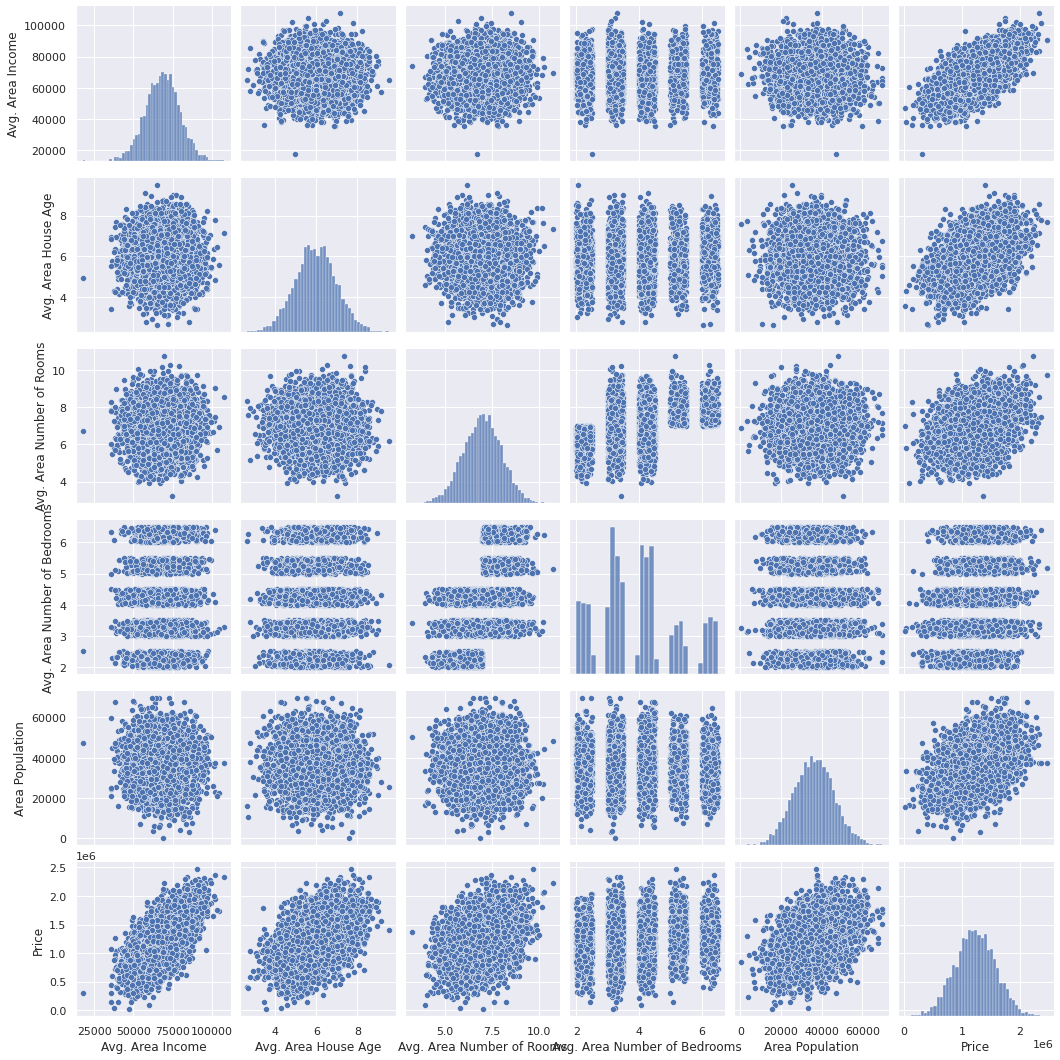

In [11]:
# membuat pairplot untuk melihat hubungan setiap kolom
sns.pairplot(df)

/home/amsopian/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

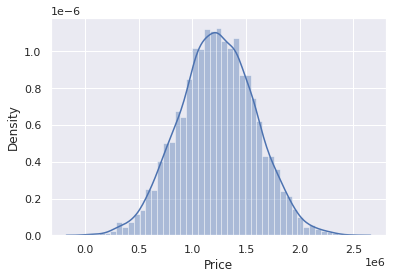

In [12]:
sns.distplot(df['Price'])

<AxesSubplot:>

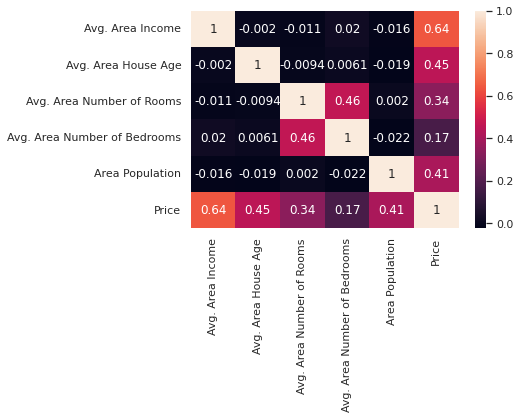

In [14]:
sns.heatmap(df.corr(),annot=True)

Harga berkorelasi paling tinggi dengan rerata oemasukan, kemudian disusul dengan umur rumah, populasi, jumlah ruangan, dan jumlah kamar tidur.  

In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Melatih model Regressi Berganda

Pilih fitur dan target

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
      'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [28]:
# Membagi data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=192)

In [29]:
print('X_train = {a}'.format(a=X_train.shape))
print('X_test = {b}'.format(b=X_test.shape))
print('y_train = {c}'.format(c=y_train.shape))
print('y_test = {d}'.format(d=y_test.shape))

X_train = (3000, 5)
X_test = (2000, 5)
y_train = (3000,)
y_test = (2000,)


## Model latih Regresi

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Evaluasi Model

In [31]:
lm.intercept_

-2646456.5925831557

In [34]:
df_with_coef = pd.DataFrame(lm.coef_, X_train.columns, columns=['Koefisien'])

In [35]:
df_with_coef

,Koefisien
Avg. Area Income,21.604792
Avg. Area House Age,164967.060909
Avg. Area Number of Rooms,121544.427045
Avg. Area Number of Bedrooms,644.343030
Area Population,15.432339


-Jika ada tambahan satu unit avg. Area income maka harga perumahan akan bertambah sebesar $21,60

-Jika ada tambahan satu unit avg. Area House Age maka harga perumahan akan bertambah sebesar $164,967

Dst.

In [37]:
## Melakukan Prediksi Model
prediksi = lm.predict(X_test)

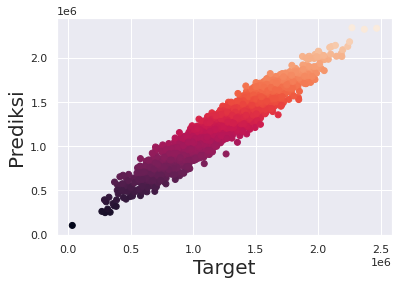

In [43]:
# membuat plot scater untuk melihat hasil prediksi dengan target
plt.scatter(y_test,prediksi, c=prediksi)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Prediksi', fontsize=20)
plt.show()

Hasil prediksi dengan target sangat baik. Karena hasil nilai prediksi memiliki grombolan data yang linear dengan target.

/home/amsopian/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

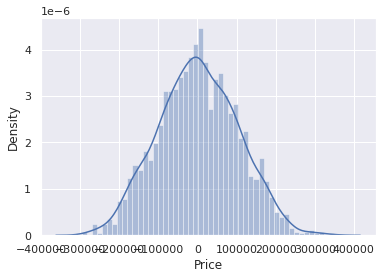

In [45]:
sns.distplot((y_test-prediksi), bins=50)

Residual atau error model berdistribusi normal. Membuktikan baahwa model regresi cukup baik dalam melakukan prediksi.

In [47]:
df_prediksi = pd.DataFrame()

In [51]:
df_prediksi['Target'] = y_test
df_prediksi['Prediksi'] = prediksi
df_prediksi['Error'] = y_test - prediksi
df_prediksi.head(20)

,Target,Prediksi,Error
1695,1.101826e+06,9.872790e+05,114547.267163
3398,8.914682e+05,8.612752e+05,30192.981933
1640,1.702529e+06,1.810976e+06,-108447.331789
475,1.053815e+06,1.126072e+06,-72256.912584
273,1.310207e+06,1.146570e+06,163637.106906
731,1.046443e+06,1.048654e+06,-2211.498078
1938,1.381443e+06,1.450955e+06,-69511.845231
4691,1.554302e+06,1.642507e+06,-88205.465767
4406,1.205212e+06,1.222384e+06,-17171.365115
2515,1.798233e+06,1.721044e+06,77188.317241


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [52]:
from sklearn import metrics

In [54]:
MAE = metrics.mean_absolute_error(y_test, prediksi)
MSE = metrics.mean_squared_error(y_test, prediksi)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediksi))

In [55]:
reg_evaluasi = [[MAE,MSE,RMSE]]
reg_evaluasi

[[81952.84955310124, 10382847187.489843, 101896.2569846893]]

In [64]:
df_reg_evaluasi = pd.DataFrame(reg_evaluasi,index=['Hasil'],columns=[['MAE','MSE','RMSE']])

In [65]:
df_reg_evaluasi

,MAE,MSE,RMSE
Hasil,81952.849553,1.038285e+10,101896.256985


## Dataset Boston sklearn

In [74]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [82]:
data.shape

(506, 13)

In [83]:
target.shape

(506,)

 ```
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per '$'10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    percentage lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 ```

In [105]:
df_boston = pd.DataFrame(data)
df_boston['Target'] = target
column = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
          'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_boston.columns = column
df_boston.head(40)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [99]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [100]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [111]:
df_boston['CHAS'].value_counts()
# 1 jika mengaliri sungai, 0 lainnya

0.0    471
1.0     35
Name: CHAS, dtype: int64

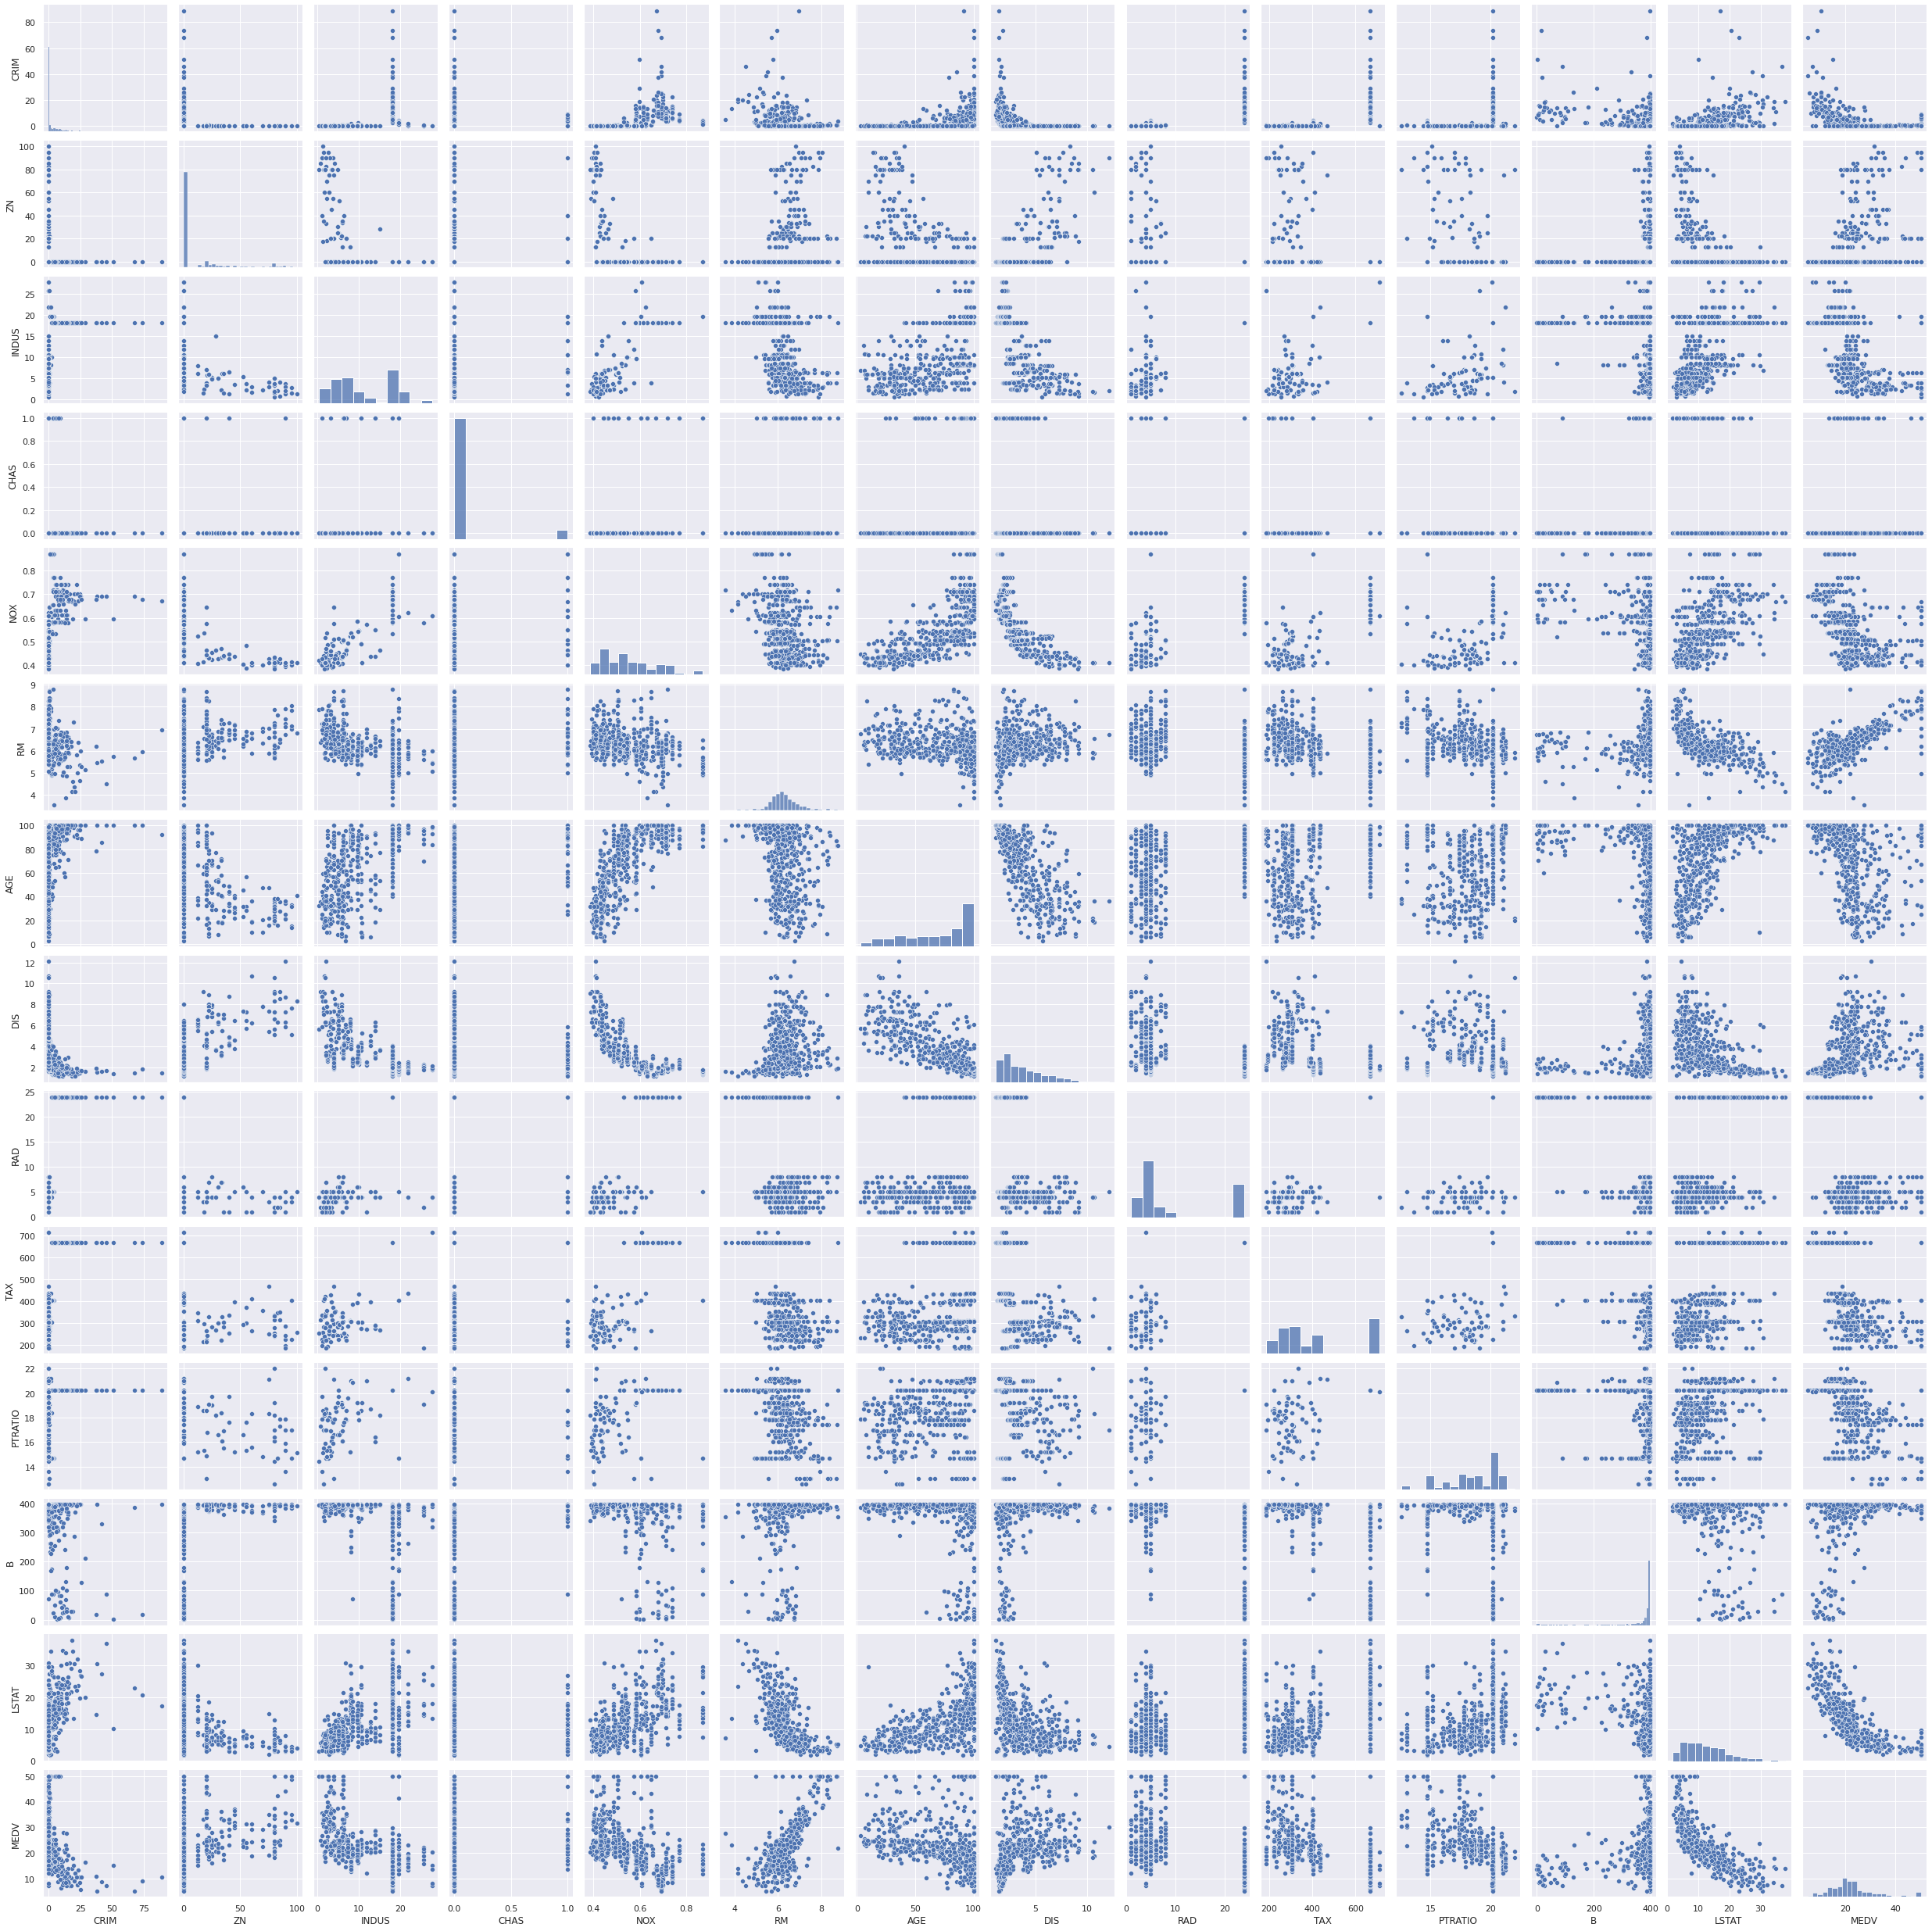

In [112]:
sns.pairplot(df_boston)

/home/amsopian/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

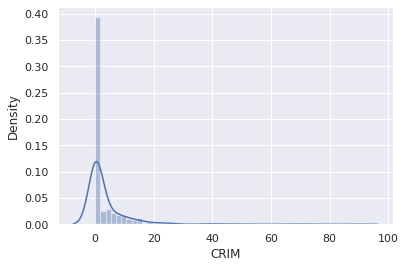

In [116]:
sns.distplot(df_boston['CRIM'])

Pada latihan ini tidak akan memperhatikan asumsi dalam regresi. Tujuan utama adalah untuk mendapatkan model regresi dengan dataset yang berbeda.

## Model Regresi

In [117]:
# split dataset
X = df_boston.drop(['MEDV'],axis=1)
y = df_boston['MEDV']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=291)

In [120]:
lm_boston = LinearRegression()

In [122]:
lm_boston.fit(X_train,y_train)

LinearRegression()

In [123]:
lm_boston.intercept_

32.54962691978501

In [124]:
lm_boston.coef_

array([-7.73484058e-02,  4.33393820e-02,  2.21795780e-02,  2.75753501e+00,
       -1.52326354e+01,  4.17378540e+00, -9.26356409e-03, -1.50123126e+00,
        2.76161948e-01, -1.29060151e-02, -8.87710316e-01,  9.46381276e-03,
       -5.08898142e-01])

In [128]:
lm_boston.score(X_train,y_train)
# R2 model regresi sebesar 74%

0.7388520627089703

In [132]:
df_boston_coef = pd.DataFrame(lm_boston.coef_,X_train.columns,columns=['Kofiesien'])
df_boston_coef

,Kofiesien
CRIM,-0.077348
ZN,0.043339
INDUS,0.022180
CHAS,2.757535
NOX,-15.232635
RM,4.173785
AGE,-0.009264
DIS,-1.501231
RAD,0.276162
TAX,-0.012906


Bila terjadi penambahan satu kasus kriminal, maka harga akan berkurang sebesar -0,07734

In [133]:
prediksi_boston = lm_boston.predict(X_test)
prediksi_boston

array([25.49953723, 27.39799513, 22.29079112, 14.04762167, 21.54481926,
       27.16308978,  3.48024119, 28.42291398,  7.91406856, 25.41253361,
       20.77196479, 20.28444588, 20.4794793 , 19.68002199, 18.42764747,
       19.27996682, 22.84602601, 31.54431614, 22.66010406, 20.79513074,
       22.95591853, 17.05171535, 11.12900906, 14.94480103, 22.77295656,
       25.56908444, 30.99050744, 21.39263368, 22.82042611, 19.26675861,
        5.86650325, 27.37703701, 28.58332322, 33.85588642, 17.20668145,
       20.31589957, 22.5129699 , 25.08051144, 44.91243497, 14.01251741,
       23.22903893, 19.36108008, 29.56763597, 34.59926684, 27.19606116,
       16.42090023, 30.76289145, 17.43974751, 12.97433745, 25.240812  ,
       19.23258821, 23.78357411, 28.62528192, 25.18187652,  5.28550273,
       13.28143885, 18.31914103, 17.71199086, 17.91640762, 26.72073893,
       23.95158305, 20.94712515, 19.67126791, 14.23281184,  3.17815654,
       19.09476933, 16.49313724, 24.7312868 , 11.01478781, 25.61

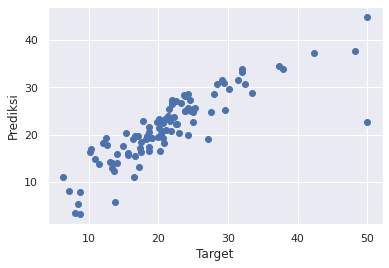

In [146]:
plt.scatter(y_test,prediksi_boston)
plt.xlabel('Target')
plt.ylabel('Prediksi')
plt.show()

Dapat dilihat bahwa model regresi cukup baik dalam memprediksi harga, dimana hasil prediksi mendekati hasil target. 

/home/amsopian/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

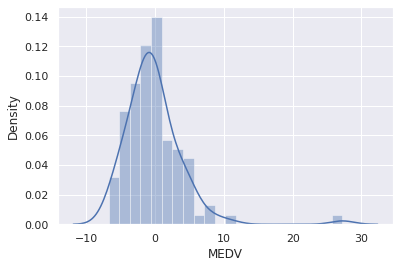

In [147]:
sns.distplot((y_test-prediksi_boston))

model sangat baik dimana niali error bergerompol pada nilai 0 dan membuat hasil terlihat seperti distribusi normal.